# HMA exercise

- The polymer [polyhydroxybutyrate](https://en.wikipedia.org/wiki/Polyhydroxybutyrate) or PHB is primarily a product of carbon assimilation (from glucose or starch) and is employed by microorganisms as a form of energy storage molecule to be metabolized when other common energy sources are not available. Microbial biosynthesis of PHB starts with the condensation of two molecules of acetyl-CoA to give acetoacetyl-CoA which is subsequently reduced to hydroxybutyryl-CoA. This latter compound is then used as a monomer to polymerize PHB.

[http://www.genome.jp/dbget-bin/www_bget?cpd:C06143](http://www.genome.jp/dbget-bin/www_bget?cpd:C06143)

- In humans PHB has some uses that derive from its easy bio-degradation qualities, being used in medicine for internal suture. The main precursor found in human bodies is 3-hydroxybutyrate, being synthesized in the liver from acetyl-CoA, and can be used as an energy source by the brain when blood glucose is low.

[http://www.hmdb.ca/metabolites/HMDB00357](http://www.hmdb.ca/metabolites/HMDB00357)

Here are some more involved reactions:
- http://www.genome.jp/dbget-bin/www_bget?rn:R00238
- http://www.genome.jp/dbget-bin/www_bget?rn:R01357
- http://www.genome.jp/dbget-bin/www_bget?rn:R01361




### Instalation

To setup your computer for this exercise, install Miniconda and:

```
$ conda install jupyter nb_conda notebook ipykernel
$ conda install requests`networkx matplotlib
$ conda install -c r r-essentials

$ cd /the/local/notebook/folder
$ jupyter notebook
```



### Swagger interface

- Web services intro
- REST API
- Swagger
- JSON


- [http://icsb.chalmers.se/swagger](http://icsb.chalmers.se/swagger)
- [http://icsb.chalmers.se/api/reactions/R_HMR_4394/](http://icsb.chalmers.se/api/reactions/R_HMR_4394/)

The JSON formatted information can also be retrieved outside of a browser. Here is how you can obtain it into the UNIX command line, and thus use it in shell scripting:

In [9]:
!curl -X GET --header 'Accept: application/json' \
--header 'X-CSRFToken: GdkwnOI45G6MYPftqfxOKJcWmj31Rcvt59l0M8HR1zQJ9GhUoIbzIvGpHSt1oYMx' \
'http://icsb.chalmers.se/api/reactions/R_HMR_4394/'


{"id":"R_HMR_4394","name":"","sbo_id":"SBO:0000176","equation":"ATP[c] + glucose[c] => ADP[c] + glucose-6-phosphate[c]","ec":"EC:2.7.1.1;EC:2.7.1.2;EC:2.7.1.147","lower_bound":0.0,"upper_bound":1000.0,"objective_coefficient":0.0,"reactants":["M_m01371c","M_m01965c"],"products":["M_m01285c","M_m01968c"],"modifiers":["E_860","E_2311","E_2312","E_2382","E_2387","E_2436"],"subsystem":"Glycolysis / Gluconeogenesis"}

### Using Python to extract API information

- Python dictionaries

To obtain REST data one convenient library is [requests](http://docs.python-requests.org/en/master/). Here is how you can obtain the same information as above:

In [10]:
import requests
url = 'http://icsb.chalmers.se/api/reactions/R_HMR_4394/'
response = requests.get(url)
print(type(response.json()))
response.json()

<class 'dict'>


{'ec': 'EC:2.7.1.1;EC:2.7.1.2;EC:2.7.1.147',
 'equation': 'ATP[c] + glucose[c] => ADP[c] + glucose-6-phosphate[c]',
 'id': 'R_HMR_4394',
 'lower_bound': 0.0,
 'modifiers': ['E_860', 'E_2311', 'E_2312', 'E_2382', 'E_2387', 'E_2436'],
 'name': '',
 'objective_coefficient': 0.0,
 'products': ['M_m01285c', 'M_m01968c'],
 'reactants': ['M_m01371c', 'M_m01965c'],
 'sbo_id': 'SBO:0000176',
 'subsystem': 'Glycolysis / Gluconeogenesis',
 'upper_bound': 1000.0}

In [11]:
hmrlist = ['HMR_1436', 'HMR_3885', 'HMR_4461', 'HMR_1577', 'HMR_1573', 'HMR_4394', 'HMR_4381', 'HMR_4379', 'HMR_4375', 'HMR_4391', 'HMR_4373',
'HMR_4368', 'HMR_4365', 'HMR_4363', 'HMR_4358', 'HMR_4137']

import requests
url = 'http://icsb.chalmers.se/api/reactions/R_{hmr}/'
for reaction in hmrlist:
    response = requests.get(url.format(hmr=reaction))
    r = response.json()
    print(r['equation'])

acetoacetate[c] + ATP[c] + CoA[c] => acetoacetyl-CoA[c] + AMP[c] + PPi[c]
acetoacetyl-CoA[m] + CoA[m] => 2 acetyl-CoA[m]
(R)-3-hydroxybutanoate[m] + NAD+[m] => acetoacetate[m] + H+[m] + NADH[m]
HMG-CoA[m] => acetoacetate[m] + acetyl-CoA[m]
acetoacetyl-CoA[m] + acetyl-CoA[m] + H2O[m] => CoA[m] + HMG-CoA[m]
ATP[c] + glucose[c] => ADP[c] + glucose-6-phosphate[c]
fructose-6-phosphate[c] => glucose-6-phosphate[c]
ATP[c] + fructose-6-phosphate[c] => ADP[c] + fructose-1,6-bisphosphate[c]
DHAP[c] + GAP[c] => fructose-1,6-bisphosphate[c]
DHAP[c] => GAP[c]
1,3-bisphospho-D-glycerate[c] + H+[c] + NADH[c] => GAP[c] + NAD+[c] + Pi[c]
1,3-bisphospho-D-glycerate[c] + ADP[c] => 3-phospho-D-glycerate[c] + ATP[c]
2-phospho-D-glycerate[c] => 3-phospho-D-glycerate[c]
2-phospho-D-glycerate[c] => H2O[c] + PEP[c]
ADP[c] + PEP[c] => ATP[c] + pyruvate[c]
CoA[m] + NAD+[m] + pyruvate[m] => acetyl-CoA[m] + CO2[m] + H+[m] + NADH[m]


Question: why is it not reversible?

- http://www.genome.jp/dbget-bin/www_bget?rn:R01357
- HMR_4461: (R)-3-hydroxybutanoate[m] + NAD+[m] => acetoacetate[m] + H+[m] + NADH[m]

<IPython.core.display.Javascript object>


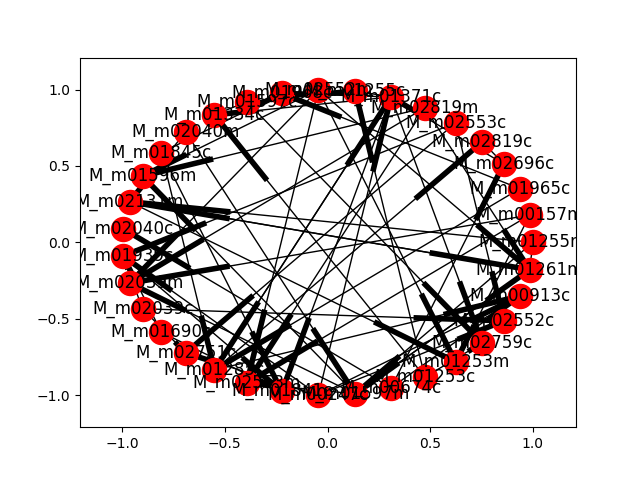

In [15]:
%matplotlib notebook

import requests
import networkx as nx

hmrlist = ['HMR_1436', 'HMR_3885', 'HMR_4461', 'HMR_1577', 'HMR_1573', 'HMR_4394', 'HMR_4381', 'HMR_4379', 'HMR_4375', 'HMR_4391', 'HMR_4373',
'HMR_4368', 'HMR_4365', 'HMR_4363', 'HMR_4358', 'HMR_4137']

G = nx.DiGraph()
url = 'http://icsb.chalmers.se/api/reactions/R_{hmr}/'
for reaction in hmrlist:
    response = requests.get(url.format(hmr=reaction))
    r = response.json()
    products = r['products']
    reactants = r['reactants']
    for n1 in reactants:
        for n2 in products:
            G.add_edge(n1, n2)

pos = nx.shell_layout(G)
nx.draw_networkx(G,pos,with_labels=True)
    

Exercise:
- Find out the set of compartments involved in the metabolism of PHB precursors.

Tip: Use Swagger, and Python sets!

In [ ]:
# put the right REST URL
url = "/{met}/"
compartments = set()  
for node in G.nodes():
    response = requests.get(url.format(met=node))
    r = response.json()
    # modify here:
    compartments.add() 
print(compartments)

## Extracting REST data via R

Here follows a small example of using R to obtain HMA data via REST API. For some future cofee time I also include the json lite vignette, showing how you can obtain various API information from places like Twitter and New York Times. And remember that the Internet is not restricted to browsers!

[https://cran.r-project.org/web/packages/jsonlite/vignettes/json-apis.html](https://cran.r-project.org/web/packages/jsonlite/vignettes/json-apis.html)

In [4]:
library(jsonlite)
reaction <- fromJSON("http://icsb.chalmers.se/api/reactions/R_HMR_4394/")
reaction

$id
[1] "R_HMR_4394"

$name
[1] ""

$sbo_id
[1] "SBO:0000176"

$equation
[1] "ATP[c] + glucose[c] => ADP[c] + glucose-6-phosphate[c]"

$ec
[1] "EC:2.7.1.1;EC:2.7.1.2;EC:2.7.1.147"

$lower_bound
[1] 0

$upper_bound
[1] 1000

$objective_coefficient
[1] 0

$reactants
[1] "M_m01371c" "M_m01965c"

$products
[1] "M_m01285c" "M_m01968c"

$modifiers
[1] "E_860"  "E_2311" "E_2312" "E_2382" "E_2387" "E_2436"

$subsystem
[1] "Glycolysis / Gluconeogenesis"

In [5]:
paste(reaction$id, ":", format(reaction$equation))

[1] "R_HMR_4394 : ATP[c] + glucose[c] => ADP[c] + glucose-6-phosphate[c]"